# INF-0619 - Trabalho Final
### Tema:
* Análise da Gravidade de Artrose no Joelho

### Grupo:
* Elcio Keniti Suzuki
* Hamilton Gonçalves de Araújo
* José Renato de Oliveira
* Maurício Luiz Sobrinho
* Tomais Gonçalves Peluso

## Instruções
#### Baixar o dataset https://drive.google.com/drive/folders/16kCVi1XH165MrqdV1PawyDfYvxSOVjio?usp=sharing
#### Descompactar o arquivo baixado no mesmo diretório deste jupyter notebook

In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import random

In [2]:
from random import seed, sample
def reset_random_seeds():
   os.environ['PYTHONHASHSEED']=str(43)
   tf.random.set_seed(43)
   np.random.seed(43)
   random.seed(43)

In [3]:
reset_random_seeds()

In [4]:
train_path= 'dataset'+ os.sep + 'train'
val_path= 'dataset'+ os.sep + 'val'
test_path= 'dataset'+ os.sep + 'test'

In [5]:
def findClassName (row):   
    if row['ClassId'] == 0 or row['ClassId'] == '0' :
        return 'Saudavel'
    if row['ClassId'] == 1 or row['ClassId'] == '1' :
        return 'Duvidoso'
    if row['ClassId'] == 2 or row['ClassId'] == '2' :
        return 'Minimo'
    if row['ClassId'] == 3 or row['ClassId'] == '3' :
        return 'Moderado'
    if row['ClassId'] == 4 or row['ClassId'] == '4' :
        return 'Severo'

## Análise Training Set

In [6]:
train_image_names = glob.glob(train_path + '/*/*.png')
print("Total number of training images: ", len(train_image_names))
train_image_names = pd.Series(train_image_names)

# train_df: a dataframe with 2 field: Filename, ClassId
train_df = pd.DataFrame()

# generate Filename field
#train_df['Filename'] = train_image_names.map(lambda img_name: img_name.split(os.sep)[-1])
train_df['Filename'] = train_image_names.map(lambda img_name: img_name)

# generate ClassId field
train_df['ClassId'] = train_image_names.map(lambda img_name: int(img_name.split(os.sep)[-2]))

train_df['ClassName'] = train_df.apply(lambda row: findClassName(row), axis=1)

Total number of training images:  5781


[Text(0, 0, '1046'),
 Text(0, 0, '1516'),
 Text(0, 0, '757'),
 Text(0, 0, '2289'),
 Text(0, 0, '173')]

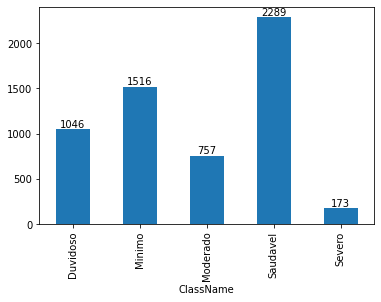

In [7]:
tmp = train_df.groupby('ClassName').count().reset_index()
ax = tmp.drop('Filename', axis=1).plot.bar(x='ClassName', legend=None)
ax.bar_label(ax.containers[0])

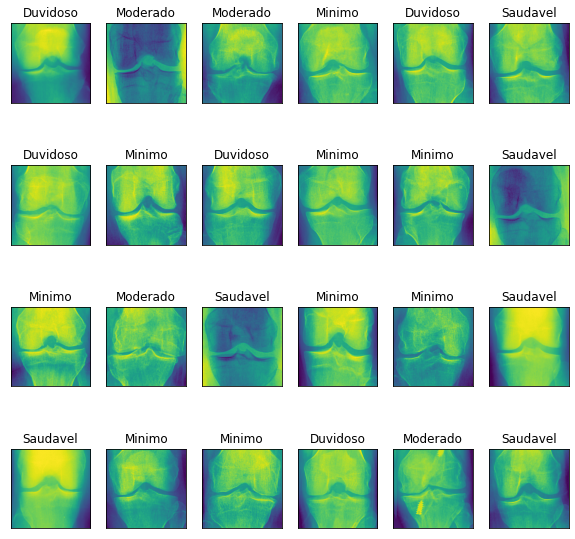

In [8]:
plot_df = train_df.sample(24).reset_index()
plt.figure(figsize=(10, 10))

for i in range(24):
    img_name = plot_df.loc[i, 'Filename']
    label_id = plot_df.loc[i, 'ClassId']
    label_name = plot_df.loc[i, 'ClassName']
    plt.subplot(4,6,i+1)
    plt.imshow(plt.imread(img_name))
    plt.title(label_name)
    plt.xticks([])
    plt.yticks([])

## Análise Validation Set

In [9]:
val_image_names = glob.glob(val_path + '/*/*.png')
print("Total number of validation images: ", len(val_image_names))
val_image_names = pd.Series(val_image_names)

# val_df: a dataframe with 2 field: Filename, ClassId
val_df = pd.DataFrame()

# generate Filename field
val_df['Filename'] = val_image_names.map(lambda img_name: img_name)

# generate ClassId field
val_df['ClassId'] = val_image_names.map(lambda img_name: int(img_name.split(os.sep)[-2]))

val_df['ClassName'] = val_df.apply(lambda row: findClassName(row), axis=1)

Total number of validation images:  826


[Text(0, 0, '153'),
 Text(0, 0, '212'),
 Text(0, 0, '106'),
 Text(0, 0, '328'),
 Text(0, 0, '27')]

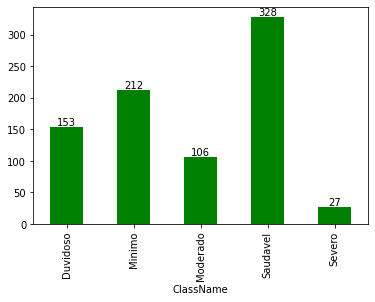

In [10]:
tmp = val_df.groupby('ClassName').count().reset_index()
ax = tmp.drop('Filename', axis=1).plot.bar(x='ClassName', legend=None, color='green')
ax.bar_label(ax.containers[0])

## Análise Test Set

In [11]:
test_image_names = glob.glob(test_path + '/*/*.png')
print("Total number of test images: ", len(test_image_names))
test_image_names = pd.Series(test_image_names)

# test_df: a dataframe with 2 field: Filename, ClassId
test_df = pd.DataFrame()

# generate Filename field
test_df['Filename'] = test_image_names.map(lambda img_name: img_name)

# generate ClassId field
test_df['ClassId'] = test_image_names.map(lambda img_name: int(img_name.split(os.sep)[-2]))

test_df['ClassName'] = test_df.apply(lambda row: findClassName(row), axis=1)

Total number of test images:  1656


[Text(0, 0, '296'),
 Text(0, 0, '447'),
 Text(0, 0, '223'),
 Text(0, 0, '639'),
 Text(0, 0, '51')]

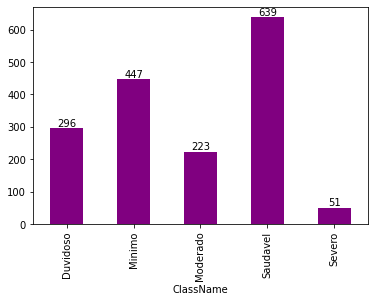

In [12]:
tmp = test_df.groupby('ClassName').count().reset_index()
ax = tmp.drop('Filename', axis=1).plot.bar(x='ClassName', legend=None, color='purple')
ax.bar_label(ax.containers[0])

## Transformação da coluna ClassId de Int para Str

In [13]:
train_df['ClassId']= train_df['ClassId'].apply(str)
val_df['ClassId']= val_df['ClassId'].apply(str)
test_df['ClassId']= test_df['ClassId'].apply(str)

## Carregamento dos Dados

In [14]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

height=224
width=224
channels=3
batch_size=32

img_shape=(height, width, channels)
img_size=(height, width)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    #rotation_range=45,
    rescale = 1./255
)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

validation_generator = train_datagen.flow_from_directory(
        val_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)


Found 5781 images belonging to 5 classes.
Found 826 images belonging to 5 classes.
Found 1656 images belonging to 5 classes.


## Análise dos Peso das Classes

In [15]:
#
# Balanceamento das classes
#
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight( 'balanced', classes=np.unique(train_generator.classes),  y=train_generator.classes)
train_class_weights = dict(enumerate(class_weights))
print(train_class_weights)

{0: 0.5051114023591088, 1: 1.1053537284894837, 2: 0.762664907651715, 3: 1.5273447820343462, 4: 6.683236994219653}


## Data Augmentation

### Desbalanceamento das Classes no Dataset de Treinamento

In [16]:
train_df.groupby('ClassName').count()

,Filename,ClassId
ClassName,,
Duvidoso,1046,1046
Minimo,1516,1516
Moderado,757,757
Saudavel,2289,2289
Severo,173,173


### Como as classes estão muito desbalanceadas, então serão considerados 600 amostras por classe

In [17]:
max_size= 600

In [18]:
sample_list=[]

groups=train_df.groupby('ClassName')
for label in train_df['ClassName'].unique():                 
    group=groups.get_group(label)
    sample_count=len(group)    
    if sample_count> max_size:
        samples=group.sample(max_size, replace=False, weights=None, random_state=123, axis=0).reset_index(drop=True)
    else:
        samples=group.sample(frac=1.0, replace=False, random_state=123, axis=0).reset_index(drop=True)
    sample_list.append(samples)
train_df=pd.concat(sample_list, axis=0).reset_index(drop=True)
print (len(train_df))     
print (train_df['ClassName'].value_counts())

2573
Moderado    600
Duvidoso    600
Minimo      600
Saudavel    600
Severo      173
Name: ClassName, dtype: int64


### Geração de dados sintéticos para completar as 600 imagens por classe

In [19]:
import shutil

In [20]:
working_dir=r'./aug'

In [21]:
aug_dir=os.path.join(working_dir)
if os.path.isdir(aug_dir):
    shutil.rmtree(aug_dir)
os.mkdir(aug_dir)
for label in train_df['ClassId'].unique():
    dir_path=os.path.join(aug_dir,label)
    os.mkdir(dir_path)
print(os.listdir(aug_dir))

['0', '4', '2', '3', '1']


### Função auxiliar para adicionar ruído gaussiano:

In [22]:
def add_noise(img):
    '''Add random noise to an image'''
    VARIABILITY = 50
    deviation = VARIABILITY*random.random()
    noise = np.random.normal(0, deviation, img.shape)
    img += noise
    np.clip(img, 0., 255.)
    return img

In [23]:
def custom_augmentation(np_tensor):
 
#  def random_contrast(np_tensor):
#    return tf.image.random_contrast(np_tensor, 0.5, 2)
 
#  def random_hue(np_tensor):
#    return tf.image.random_hue(np_tensor, 0.5)
 
#  def random_saturation(np_tensor):
#    return tf.image.random_saturation(np_tensor, 0.2, 3)

  def set_brightness(np_tensor):
    return tf.image.adjust_brightness(np_tensor, 0.01)
 
#  augmnted_tensor = random_contrast(np_tensor)
#  augmnted_tensor = random_hue(augmnted_tensor)
#  augmnted_tensor = random_saturation(augmnted_tensor)
  augmnted_tensor = brightness(augmnted_tensor)
  return np.array(augmnted_tensor)

In [24]:
  def set_brightness(np_tensor):
    return tf.image.adjust_brightness(np_tensor, 0.99)

In [25]:
target=600 # set the target count for each class in df

In [26]:

gen=tf.keras.preprocessing.image.ImageDataGenerator(
        horizontal_flip=True,
        rotation_range=20,
        width_shift_range=.2,
        height_shift_range=.2,
        zoom_range=.2,
        preprocessing_function=add_noise
)
groups=train_df.groupby('ClassId') # group by class
for label in train_df['ClassId'].unique():  # for every class               
    group=groups.get_group(label)  # a dataframe holding only rows with the specified label 
    sample_count=len(group)   # determine how many samples there are in this class  
    if sample_count< target: # if the class has less than target number of images
        aug_img_count=0
        delta=target-sample_count  # number of augmented images to create
        target_dir=os.path.join(aug_dir, label)  # define where to write the images    
        aug_gen=gen.flow_from_dataframe( group,  x_col='Filename', y_col=None, target_size=img_size, class_mode=None, batch_size=1,
                                         shuffle=False, save_to_dir=target_dir, save_prefix='aug',save_format='jpg')
        while aug_img_count<delta:
            images=next(aug_gen)            
            aug_img_count += len(images) 

Found 173 validated image filenames.


### Dataset de treinamento balanceado com 600 imagens por categoria 

In [27]:
aug_fpaths=[]
aug_labels=[]
classlist=os.listdir(aug_dir)
for klass in classlist:
    classpath=os.path.join(aug_dir, klass)     
    flist=os.listdir(classpath)    
    for f in flist:        
        fpath=os.path.join(classpath,f)         
        aug_fpaths.append(fpath)
        aug_labels.append(klass)
Fseries=pd.Series(aug_fpaths, name='Filename')
Lseries=pd.Series(aug_labels, name='ClassId')
aug_df=pd.concat([Fseries, Lseries], axis=1)
aug_df['ClassName'] = aug_df.apply(lambda row: findClassName(row), axis=1)
print ('length of aug_df is: ', len(aug_df))
train_df=pd.concat([train_df,aug_df], axis=0).reset_index(drop=True)
train_df=train_df.sample(frac=1.0, replace=False, random_state=123, axis=0).reset_index(drop=True)
print ('length of train_df is: ', len(train_df)) 
print (train_df['ClassId'].value_counts())     

length of aug_df is:  427
length of train_df is:  3000
2    600
3    600
0    600
1    600
4    600
Name: ClassId, dtype: int64


In [28]:
trgen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
train_aug_generator = trgen.flow_from_dataframe(train_df, x_col='Filename', y_col='ClassId', target_size=img_size,
                                          class_mode='categorical',shuffle=True, batch_size=batch_size)

Found 3000 validated image filenames belonging to 5 classes.


### Exemplos das imagens sintéticas

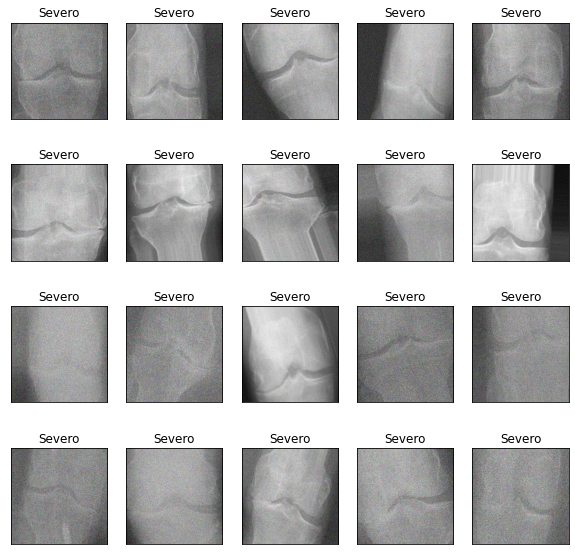

In [29]:
plot_df = aug_df.sample(20).reset_index()
plt.figure(figsize=(10, 10))

for i in range(20):
    img_name = plot_df.loc[i, 'Filename']
    label_id = plot_df.loc[i, 'ClassId']
    label_name = plot_df.loc[i, 'ClassName']
    plt.subplot(4,5,i+1)
    plt.imshow(plt.imread(img_name))
    plt.title(label_name)
    plt.xticks([])
    plt.yticks([])

## Double check do Balanceamento das Classes

In [30]:
#
# Balanceamento das classes
#
class_weights = class_weight.compute_class_weight( 'balanced', classes=np.unique(train_aug_generator.classes),  y=train_aug_generator.classes)
train_aug_class_weights = dict(enumerate(class_weights))
print(train_aug_class_weights)

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0}


## Treinamento do Modelo Baseline e Outros Experimentos

### Hyper-Parameters utilizados no Modelo Baseline + Experimentos

In [31]:
EPOCHS = 50
LEARNING_RATE = 0.001
BATCH_SIZE = 32

### Early Stop

In [32]:
PATIENCE = 10

### Funções Auxiliares

In [33]:
from sklearn.metrics import roc_auc_score
#from keras.callbacks import Callback
from tensorflow.keras.callbacks import Callback
class RocCallback(Callback):
    def __init__(self,training_data,validation_data):
        # training
        batch_index = 0
        while batch_index <= training_data.batch_index:
            img, label = training_data.next()
            if batch_index ==0:
              img_list = img
              label_list = label
            else:
              img_list = np.concatenate((img_list, img), axis=0)
              label_list = np.concatenate((label_list, label), axis=0)
            batch_index = batch_index + 1
        self.x = img_list
        self.y = label_list

        # validation
        batch_index = 0
        while batch_index <= validation_data.batch_index:
            img, label = validation_data.next()
            if batch_index ==0:
              img_list = img
              label_list = label
            else:
              img_list = np.concatenate((img_list, img), axis=0)
              label_list = np.concatenate((label_list, label), axis=0)
            batch_index = batch_index + 1
        self.x_val = img_list
        self.y_val = label_list


    def on_epoch_end(self, epoch, logs={}):
        y_pred_train = self.model.predict(self.x)
        print("SHAPE", y_pred_train.shape)
        roc_train = roc_auc_score(self.y[:,1], y_pred_train[:,1])
        y_pred_val = self.model.predict(self.x_val)
        roc_val = roc_auc_score(self.y_val[:,1], y_pred_val[:,1])
        logs["train_auc"] = roc_train
        logs["val_auc"] = roc_val
        keys = list(logs.keys())
        print('\rroc-auc_train: %s - roc-auc_val: %s' % (str(round(roc_train,4)),str(round(roc_val,4))),end=100*' '+'\n')
        return

In [34]:
roc = RocCallback(training_data=train_aug_generator,
                  validation_data=validation_generator)
from tensorflow.keras.callbacks import EarlyStopping

early = EarlyStopping(monitor='val_loss', patience=PATIENCE, restore_best_weights=True)
callbacksLst = [roc, early]

In [35]:
def tr_plot(tr_data, start_epoch):
    #Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout
    #plt.style.use('fivethirtyeight')
    plt.show()

In [36]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style('darkgrid')

def print_info( test_gen, preds, print_code, save_dir, subject ):
    class_dict=test_gen.class_indices
    labels= test_gen.labels
    file_names= test_gen.filenames 
    error_list=[]
    true_class=[]
    pred_class=[]
    prob_list=[]
    new_dict={}
    error_indices=[]
    y_pred=[]
    for key,value in class_dict.items():
        new_dict[value]=key             # dictionary {integer of class number: string of class name}
    # store new_dict as a text fine in the save_dir
    classes=list(new_dict.values())     # list of string of class names
    dict_as_text=str(new_dict)
    dict_name= subject + '-' +str(len(classes)) +'.txt'  
    dict_path=os.path.join(save_dir,dict_name)    
    with open(dict_path, 'w') as x_file:
        x_file.write(dict_as_text)    
    errors=0      
    for i, p in enumerate(preds):
        pred_index=np.argmax(p)        
        true_index=labels[i]  # labels are integer values
        if pred_index != true_index: # a misclassification has occurred
            error_list.append(file_names[i])
            true_class.append(new_dict[true_index])
            pred_class.append(new_dict[pred_index])
            prob_list.append(p[pred_index])
            error_indices.append(true_index)            
            errors=errors + 1
        y_pred.append(pred_index)    
    if print_code !=0:
        if errors>0:
            if print_code>errors:
                r=errors
            else:
                r=print_code           
            msg='{0:^28s}{1:^28s}{2:^28s}{3:^16s}'.format('Filename', 'Predicted Class' , 'True Class', 'Probability')
            print_in_color(msg, (0,255,0),(55,65,80))
            for i in range(r):                
                split1=os.path.split(error_list[i])                
                split2=os.path.split(split1[0])                
                fname=split2[1] + '/' + split1[1]
                msg='{0:^28s}{1:^28s}{2:^28s}{3:4s}{4:^6.4f}'.format(fname, pred_class[i],true_class[i], ' ', prob_list[i])
                print_in_color(msg, (255,255,255), (55,65,60))
                #print(error_list[i]  , pred_class[i], true_class[i], prob_list[i])               
        else:
            msg='With accuracy of 100 % there are no errors to print'
            print_in_color(msg, (0,255,0),(55,65,80))
    if errors>0:
        plot_bar=[]
        plot_class=[]
        for  key, value in new_dict.items():        
            count=error_indices.count(key) 
            if count!=0:
                plot_bar.append(count) # list containg how many times a class c had an error
                plot_class.append(value)   # stores the class 
        fig=plt.figure()
        fig.set_figheight(len(plot_class)/3)
        fig.set_figwidth(10)
        plt.style.use('fivethirtyeight')
        for i in range(0, len(plot_class)):
            c=plot_class[i]
            x=plot_bar[i]
            plt.barh(c, x, )
            plt.title( ' Errors by Class on Test Set')
    y_true= np.array(labels)        
    y_pred=np.array(y_pred)
    if len(classes)<= 30:
        # create a confusion matrix 
        cm = confusion_matrix(y_true, y_pred )        
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Categoria Prevista")
        plt.ylabel("Categoria Real")
        plt.title("Matriz de Confusão")
        plt.show()
    clr = classification_report(y_true, y_pred, target_names=classes)
    print("Classification Report:\n----------------------\n", clr)

## Modelo Baseline
### Utilizar:
* train_aug_generator
* train_class_weights
* validation_generator

In [37]:
MODEL_NAME='Simple_CNN'

from tensorflow.keras import layers

model_baseline = tf.keras.Sequential()
#Camada convolucional com 10 filtros de tamanho 3x3 e ativação ReLU
model_baseline.add(layers.Conv2D(32, 3, padding='valid', activation='relu', input_shape=img_shape))
#Max pooling de tamanho 2x2
model_baseline.add(layers.MaxPooling2D(pool_size=(2,2)))
#Operação de vetorização dos dados
model_baseline.add(layers.Flatten())
#Densa com 10 nós de saída
model_baseline.add(layers.Dense(5))

model_baseline.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 394272)            0         
_________________________________________________________________
dense (Dense)                (None, 5)                 1971365   
Total params: 1,972,261
Trainable params: 1,972,261
Non-trainable params: 0
_________________________________________________________________


In [38]:
model_baseline.compile(optimizer=tf.keras.optimizers.Adam(LEARNING_RATE),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
history = model_baseline.fit(train_aug_generator, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=callbacksLst, validation_data=validation_generator)

Epoch 1/50
94/94 [==============================] - 9s 68ms/step - loss: 5.6262 - accuracy: 0.3047 - val_loss: 1.4850 - val_accuracy: 0.2215
SHAPE (3000, 5)
roc-auc_train: 0.5429 - roc-auc_val: 0.5255                                                                                                    
Epoch 2/50
94/94 [==============================] - 6s 66ms/step - loss: 1.3873 - accuracy: 0.3637 - val_loss: 1.5473 - val_accuracy: 0.1864
SHAPE (3000, 5)
roc-auc_train: 0.5246 - roc-auc_val: 0.5301                                                                                                    
Epoch 3/50
94/94 [==============================] - 6s 64ms/step - loss: 1.4254 - accuracy: 0.3627 - val_loss: 1.6084 - val_accuracy: 0.2712
SHAPE (3000, 5)
roc-auc_train: 0.4453 - roc-auc_val: 0.5349                                                                                                    
Epoch 4/50
94/94 [==============================] - 6s 64ms/step - loss: 1.3636 - accuracy: 0.392

In [40]:
# Avalia o modelo na validação
score = model_baseline.evaluate(validation_generator, verbose=1)

print('Valid loss:', score[0])
print('Valid acc:', score[1])

26/26 [==============================] - 1s 51ms/step - loss: 1.3518 - accuracy: 0.4346
Valid loss: 1.351841688156128
Valid acc: 0.43462470173835754


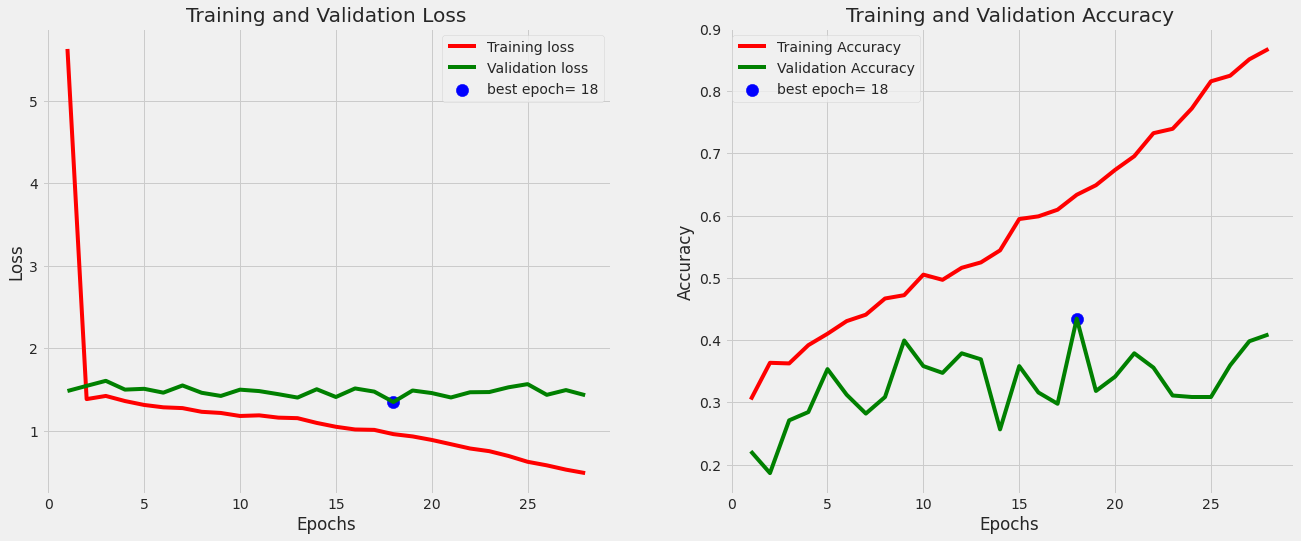

accuracy on the validation set is 43.46 %


In [41]:
tr_plot(history,0)
save_dir=r'./'
subject = MODEL_NAME
acc=score[1]*100
msg=f'accuracy on the validation set is {acc:5.2f} %'
print(msg)
save_id=str (MODEL_NAME + '-' + str(acc)[:str(acc).rfind('.')+3] + '.h5')
save_loc=os.path.join(save_dir, save_id)
model_baseline.save(save_loc)

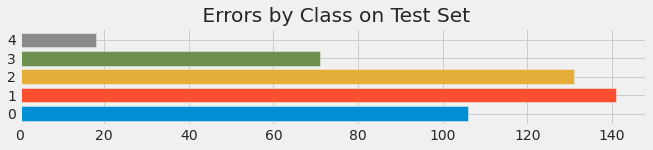

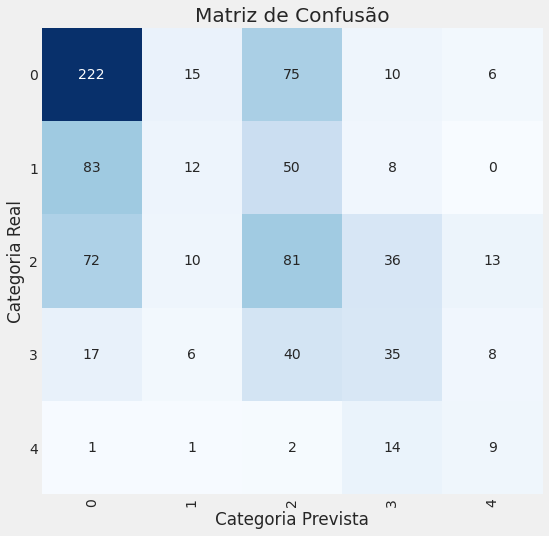

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.56      0.68      0.61       328
           1       0.27      0.08      0.12       153
           2       0.33      0.38      0.35       212
           3       0.34      0.33      0.33       106
           4       0.25      0.33      0.29        27

    accuracy                           0.43       826
   macro avg       0.35      0.36      0.34       826
weighted avg       0.41      0.43      0.41       826



In [42]:
print_code=0
preds=model_baseline.predict(validation_generator) 
print_info( validation_generator, preds, print_code, save_dir, subject )  

## Experimentos:
### Utilizar:
* train_aug_generator
* train_aug_class_weights (se necessário)
* validation_generator

### Resnet50

In [43]:
# Carregamento do modelo pré-treinado SEM as camadas densas (include_top = False)
model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=img_shape)
model.summary()

for layer in model.layers:
    layer.trainable = False

frozen_model = tf.keras.Sequential([
  model,
  tf.keras.layers.GlobalAveragePooling2D()
])

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [44]:
feats_train = frozen_model.predict(train_aug_generator)
feats_val = frozen_model.predict(validation_generator)

In [45]:
print(feats_train.shape)

from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


clf = MLPClassifier(random_state=1, max_iter=400).fit(feats_train, train_aug_generator.labels)

(3000, 2048)


In [46]:
acc_mlp = clf.score(feats_val, validation_generator.labels)
print("ACC MLP:", acc_mlp)

ACC MLP: 0.1271186440677966


### Resnet50 + Dense Layers

In [47]:
MODEL_NAME = 'ResNet50_dense_layers'

In [48]:
for layer in model.layers:
    layer.trainable = False

frozen_model = tf.keras.Sequential([
  model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(5, activation='softmax')
])

In [49]:
sgd = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE, momentum=0.9)

frozen_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history = frozen_model.fit(train_aug_generator, epochs=EPOCHS, callbacks=callbacksLst,
                  validation_data=validation_generator)

Epoch 1/50
94/94 [==============================] - 9s 71ms/step - loss: 1.6864 - accuracy: 0.1973 - val_loss: 1.5813 - val_accuracy: 0.1283
SHAPE (3000, 5)
roc-auc_train: 0.556 - roc-auc_val: 0.4591                                                                                                    
Epoch 2/50
94/94 [==============================] - 6s 65ms/step - loss: 1.6534 - accuracy: 0.2217 - val_loss: 1.5043 - val_accuracy: 0.3971
SHAPE (3000, 5)
roc-auc_train: 0.5675 - roc-auc_val: 0.4677                                                                                                    
Epoch 3/50
94/94 [==============================] - 6s 65ms/step - loss: 1.6444 - accuracy: 0.2140 - val_loss: 1.5593 - val_accuracy: 0.3971
SHAPE (3000, 5)
roc-auc_train: 0.5849 - roc-auc_val: 0.4883                                                                                                    
Epoch 4/50
94/94 [==============================] - 6s 64ms/step - loss: 1.6340 - accuracy: 0.2273

In [50]:
# Avalia o modelo na validação
score = frozen_model.evaluate(validation_generator, verbose=1)

print('Valid loss:', score[0])
print('Valid acc:', score[1])

26/26 [==============================] - 1s 54ms/step - loss: 1.5026 - accuracy: 0.1852
Valid loss: 1.502596378326416
Valid acc: 0.18523003160953522


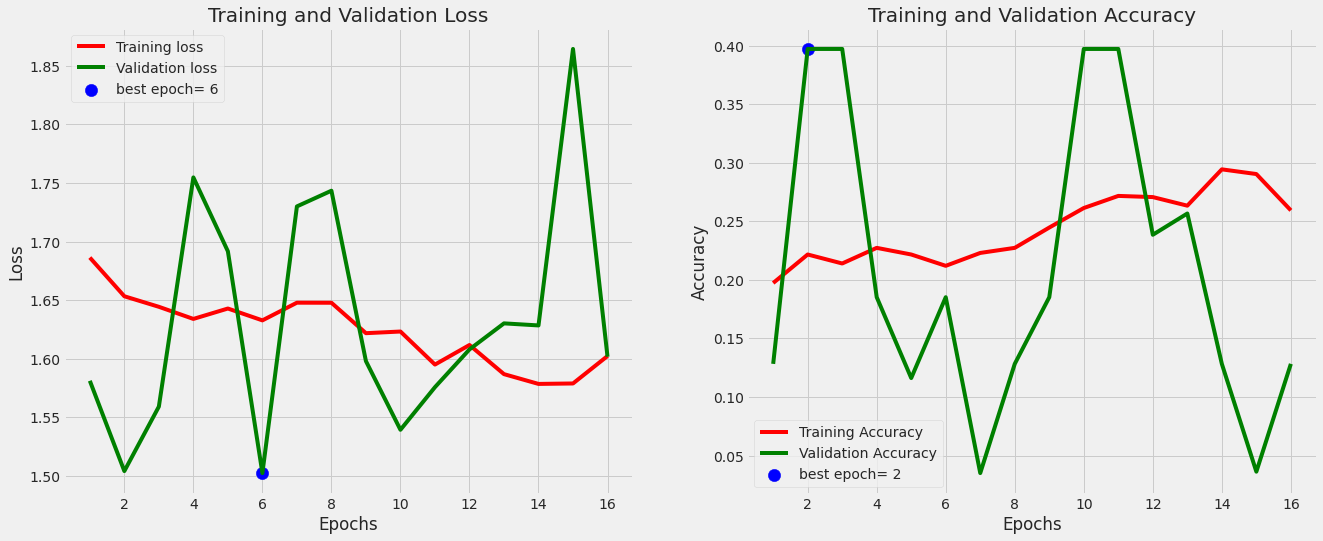

accuracy on the validation set is 18.52 %


/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [51]:
tr_plot(history,0)
save_dir=r'./'
subject = MODEL_NAME
acc=score[1]*100
msg=f'accuracy on the validation set is {acc:5.2f} %'
print(msg)
save_id=str (MODEL_NAME + '-' + str(acc)[:str(acc).rfind('.')+3] + '.h5')
save_loc=os.path.join(save_dir, save_id)
frozen_model.save(save_loc)

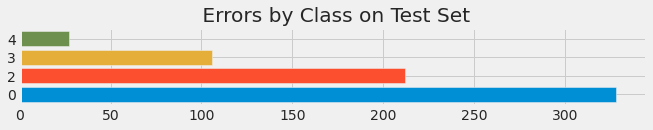

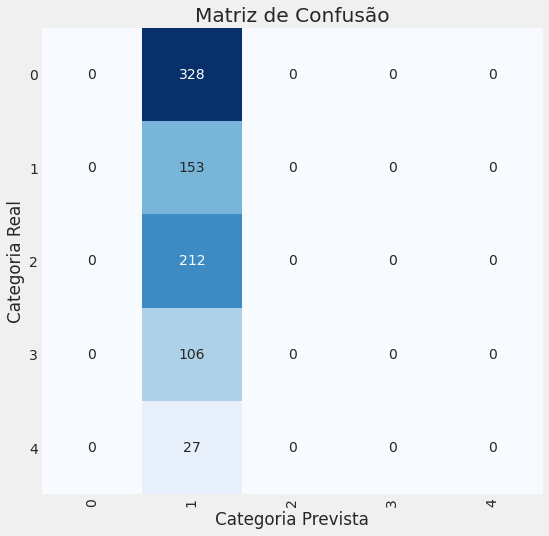

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       328
           1       0.19      1.00      0.31       153
           2       0.00      0.00      0.00       212
           3       0.00      0.00      0.00       106
           4       0.00      0.00      0.00        27

    accuracy                           0.19       826
   macro avg       0.04      0.20      0.06       826
weighted avg       0.03      0.19      0.06       826



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
print_code=0
preds=frozen_model.predict(validation_generator) 
print_info( validation_generator, preds, print_code, save_dir, subject )  

### Resnet50 + Dense Layers + Fine Tuning

In [53]:
MODEL_NAME = 'ResNet50_dense_layers_fine_tuning'

In [54]:
for layer in model.layers:
    layer.trainable = True

ft_model = tf.keras.Sequential([
  model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(5, activation='softmax')
])    
    
ft_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 10245     
Total params: 23,597,957
Trainable params: 23,544,837
Non-trainable params: 53,120
_________________________________________________________________


In [55]:
ft_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history = ft_model.fit(train_aug_generator, epochs=EPOCHS, callbacks=callbacksLst,
                  validation_data=validation_generator)

Epoch 1/50
94/94 [==============================] - 12s 86ms/step - loss: 1.2609 - accuracy: 0.4307 - val_loss: 1.9813 - val_accuracy: 0.2567
SHAPE (3000, 5)
roc-auc_train: 0.4604 - roc-auc_val: 0.4851                                                                                                    
Epoch 2/50
94/94 [==============================] - 7s 74ms/step - loss: 0.8146 - accuracy: 0.6527 - val_loss: 2.0807 - val_accuracy: 0.2567
SHAPE (3000, 5)
roc-auc_train: 0.5818 - roc-auc_val: 0.5338                                                                                                    
Epoch 3/50
94/94 [==============================] - 8s 80ms/step - loss: 0.5248 - accuracy: 0.7950 - val_loss: 3.1368 - val_accuracy: 0.2567
SHAPE (3000, 5)
roc-auc_train: 0.5435 - roc-auc_val: 0.5204                                                                                                    
Epoch 4/50
94/94 [==============================] - 7s 76ms/step - loss: 0.2842 - accuracy: 0.91

In [56]:
score = ft_model.evaluate(validation_generator, verbose=1)

print('Valid loss:', score[0])
print('Valid acc:', score[1])

26/26 [==============================] - 1s 52ms/step - loss: 1.9813 - accuracy: 0.2567
Valid loss: 1.981257438659668
Valid acc: 0.2566585838794708


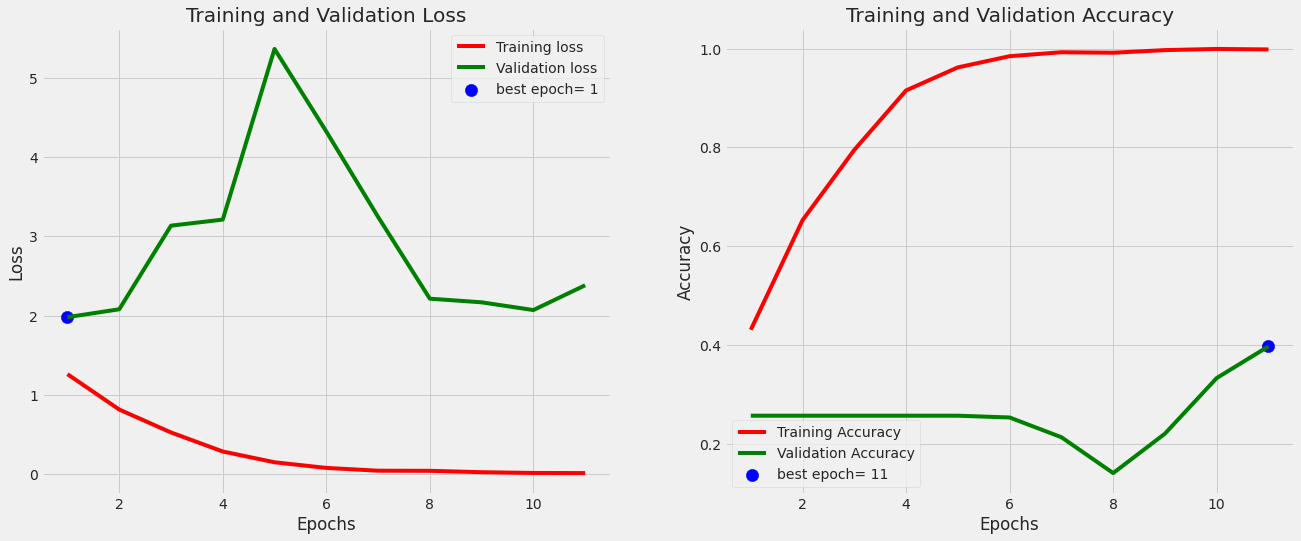

accuracy on the validation set is 25.67 %


/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [57]:
tr_plot(history,0)
save_dir=r'./'
subject = MODEL_NAME
acc=score[1]*100
msg=f'accuracy on the validation set is {acc:5.2f} %'
print(msg)
save_id=str (MODEL_NAME + '-' + str(acc)[:str(acc).rfind('.')+3] + '.h5')
save_loc=os.path.join(save_dir, save_id)
ft_model.save(save_loc)

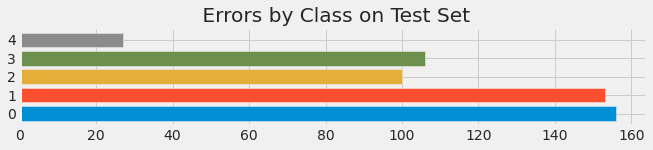

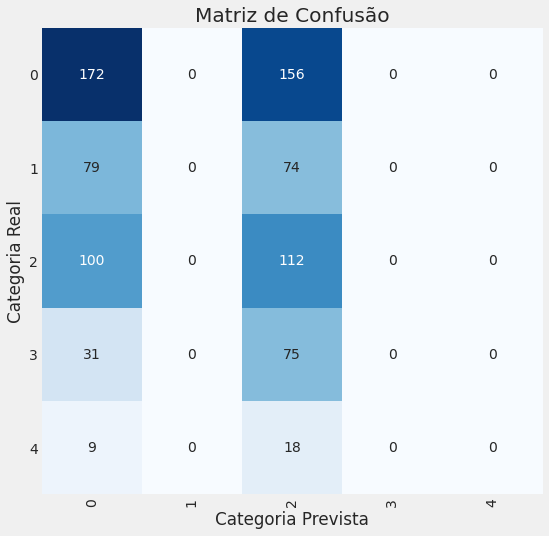

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.44      0.52      0.48       328
           1       0.00      0.00      0.00       153
           2       0.26      0.53      0.35       212
           3       0.00      0.00      0.00       106
           4       0.00      0.00      0.00        27

    accuracy                           0.34       826
   macro avg       0.14      0.21      0.16       826
weighted avg       0.24      0.34      0.28       826



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
print_code=0
preds=frozen_model.predict(validation_generator) 
print_info( validation_generator, preds, print_code, save_dir, subject )  

### VGG16

In [59]:
MODEL_NAME = 'Vgg16'

In [60]:
# Carregamento do modelo pré-treinado SEM as camadas densas (include_top = False)
vgg_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
vgg_model.summary()

for layer in vgg_model.layers:
    layer.trainable = False

vgg_frozen_model = tf.keras.Sequential([
  vgg_model,
  tf.keras.layers.GlobalAveragePooling2D()
])

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [61]:
feats_train = vgg_frozen_model.predict(train_aug_generator)
feats_val = vgg_frozen_model.predict(validation_generator)

In [62]:
print(feats_train.shape)

from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


clf = MLPClassifier(random_state=1, max_iter=400).fit(feats_train, train_aug_generator.labels)

(3000, 512)


In [63]:
acc_mlp = clf.score(feats_val, validation_generator.labels)
print("ACC MLP:", acc_mlp)

ACC MLP: 0.20217917675544794


### VGG16 + Dense Layers

In [64]:
MODEL_NAME = 'Vgg16_dense_layers'

In [65]:
for layer in vgg_model.layers:
    layer.trainable = False

vgg_frozen_model = tf.keras.Sequential([
  vgg_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(5, activation='softmax')
])

In [66]:
sgd = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE, momentum=0.9)

vgg_frozen_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history = vgg_frozen_model.fit(train_aug_generator, epochs=EPOCHS, callbacks=callbacksLst,
                  validation_data=validation_generator)

Epoch 1/50
94/94 [==============================] - 7s 67ms/step - loss: 1.6083 - accuracy: 0.2507 - val_loss: 1.5937 - val_accuracy: 0.2240
SHAPE (3000, 5)
roc-auc_train: 0.5373 - roc-auc_val: 0.4682                                                                                                    
Epoch 2/50
94/94 [==============================] - 6s 66ms/step - loss: 1.5728 - accuracy: 0.3103 - val_loss: 1.6117 - val_accuracy: 0.1925
SHAPE (3000, 5)
roc-auc_train: 0.5878 - roc-auc_val: 0.4801                                                                                                    
Epoch 3/50
94/94 [==============================] - 6s 63ms/step - loss: 1.5496 - accuracy: 0.3043 - val_loss: 1.6036 - val_accuracy: 0.1223
SHAPE (3000, 5)
roc-auc_train: 0.5987 - roc-auc_val: 0.4877                                                                                                    
Epoch 4/50
94/94 [==============================] - 9s 94ms/step - loss: 1.5352 - accuracy: 0.308

In [67]:
score = vgg_frozen_model.evaluate(validation_generator, verbose=1)

print('Valid loss:', score[0])
print('Valid acc:', score[1])

26/26 [==============================] - 1s 50ms/step - loss: 1.4922 - accuracy: 0.3959
Valid loss: 1.4922378063201904
Valid acc: 0.3958837687969208


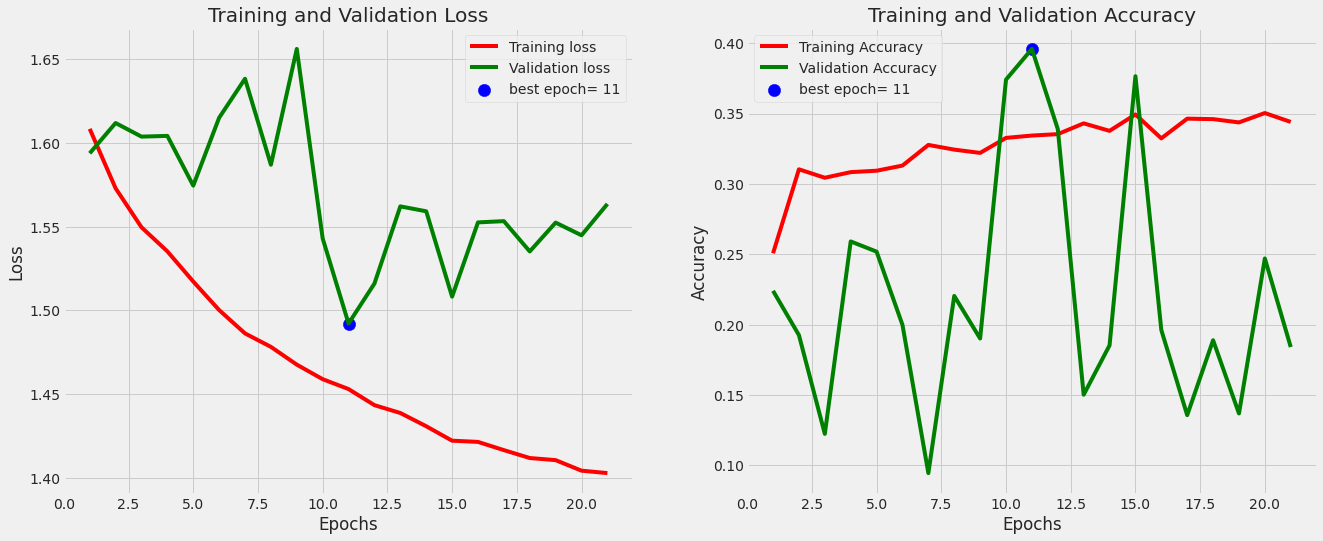

accuracy on the validation set is 39.59 %


In [68]:
tr_plot(history,0)
save_dir=r'./'
subject = MODEL_NAME
acc=score[1]*100
msg=f'accuracy on the validation set is {acc:5.2f} %'
print(msg)
save_id=str (MODEL_NAME + '-' + str(acc)[:str(acc).rfind('.')+3] + '.h5')
save_loc=os.path.join(save_dir, save_id)
vgg_frozen_model.save(save_loc)

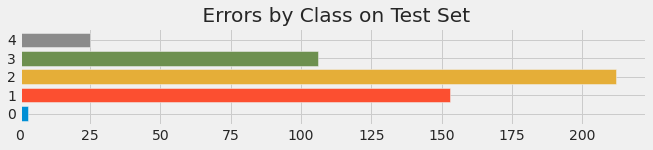

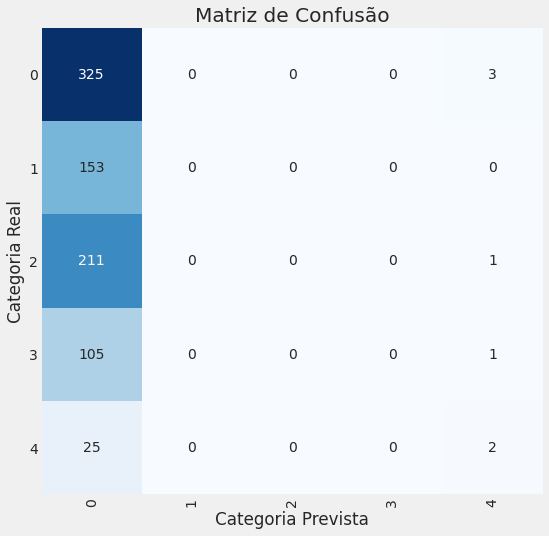

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.40      0.99      0.57       328
           1       0.00      0.00      0.00       153
           2       0.00      0.00      0.00       212
           3       0.00      0.00      0.00       106
           4       0.29      0.07      0.12        27

    accuracy                           0.40       826
   macro avg       0.14      0.21      0.14       826
weighted avg       0.17      0.40      0.23       826



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
print_code=0
preds=vgg_frozen_model.predict(validation_generator) 
print_info( validation_generator, preds, print_code, save_dir, subject )  

### VGG + Dense Layers + Fine Tuning

In [70]:
MODEL_NAME = 'Vgg16_dense_layers_fine_tuning'

In [71]:
for layer in vgg_model.layers:
    layer.trainable = True

vgg_ft_model = tf.keras.Sequential([
  vgg_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(5, activation='softmax')
])    
    
vgg_ft_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_5 ( (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 2565      
Total params: 14,717,253
Trainable params: 14,717,253
Non-trainable params: 0
_________________________________________________________________


In [72]:
vgg_ft_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history = vgg_ft_model.fit(train_aug_generator, epochs=EPOCHS, callbacks=callbacksLst,
                  validation_data=validation_generator)

Epoch 1/50
94/94 [==============================] - 9s 77ms/step - loss: 1.4619 - accuracy: 0.2963 - val_loss: 1.6835 - val_accuracy: 0.0642
SHAPE (3000, 5)
roc-auc_train: 0.5959 - roc-auc_val: 0.5196                                                                                                    
Epoch 2/50
94/94 [==============================] - 7s 70ms/step - loss: 1.4048 - accuracy: 0.3197 - val_loss: 1.4880 - val_accuracy: 0.2651
SHAPE (3000, 5)
roc-auc_train: 0.6908 - roc-auc_val: 0.5644                                                                                                    
Epoch 3/50
94/94 [==============================] - 6s 68ms/step - loss: 1.3449 - accuracy: 0.3727 - val_loss: 1.4044 - val_accuracy: 0.1973
SHAPE (3000, 5)
roc-auc_train: 0.7083 - roc-auc_val: 0.5841                                                                                                    
Epoch 4/50
94/94 [==============================] - 6s 68ms/step - loss: 1.2704 - accuracy: 0.398

In [73]:
score = vgg_ft_model.evaluate(test_generator, verbose=1)

print('Valid loss:', score[0])
print('Valid acc:', score[1])

52/52 [==============================] - 3s 52ms/step - loss: 0.8266 - accuracy: 0.6643
Valid loss: 0.8265881538391113
Valid acc: 0.6642512083053589


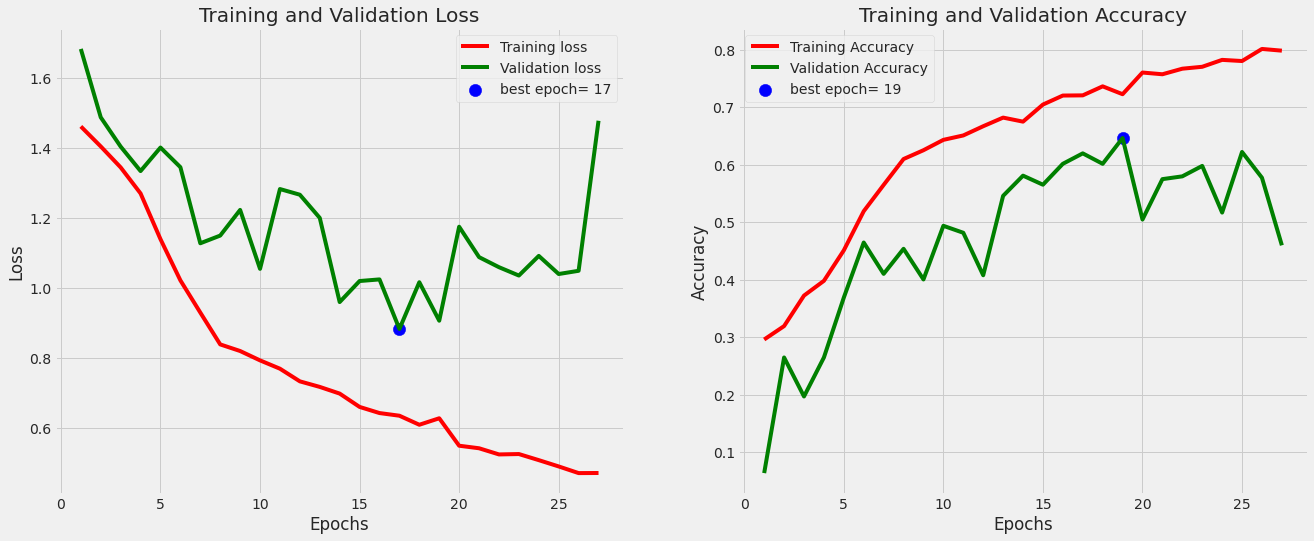

accuracy on the validation set is 66.43 %


In [74]:
tr_plot(history,0)
save_dir=r'./'
subject = MODEL_NAME
acc=score[1]*100
msg=f'accuracy on the validation set is {acc:5.2f} %'
print(msg)
save_id=str (MODEL_NAME + '-' + str(acc)[:str(acc).rfind('.')+3] + '.h5')
save_loc=os.path.join(save_dir, save_id)
vgg_ft_model.save(save_loc)

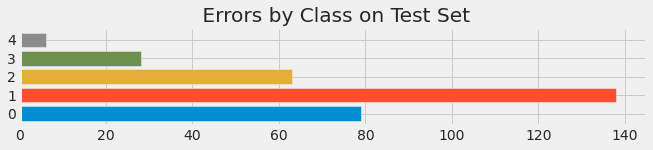

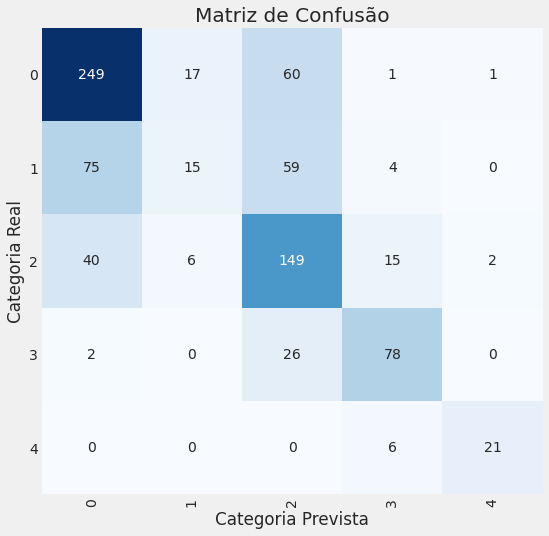

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.68      0.76      0.72       328
           1       0.39      0.10      0.16       153
           2       0.51      0.70      0.59       212
           3       0.75      0.74      0.74       106
           4       0.88      0.78      0.82        27

    accuracy                           0.62       826
   macro avg       0.64      0.61      0.61       826
weighted avg       0.60      0.62      0.59       826



In [75]:
print_code=0
preds=vgg_ft_model.predict(validation_generator) 
print_info( validation_generator, preds, print_code, save_dir, subject )  

## Predição nos dados de teste do Melhor Modelo

In [79]:
save_dir=r'./'
subject = 'best_model'

In [80]:
best_model = tf.keras.models.load_model('Vgg16_dense_layers_fine_tuning-66.42.h5')

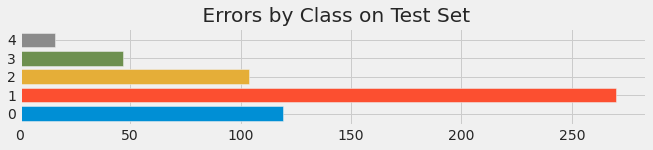

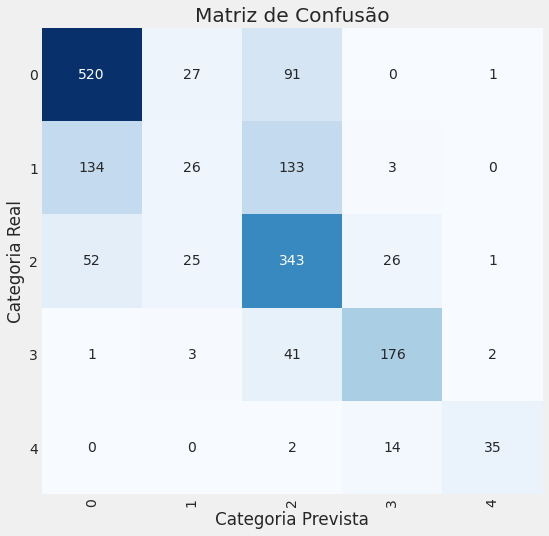

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.74      0.81      0.77       639
           1       0.32      0.09      0.14       296
           2       0.56      0.77      0.65       447
           3       0.80      0.79      0.80       223
           4       0.90      0.69      0.78        51

    accuracy                           0.66      1656
   macro avg       0.66      0.63      0.63      1656
weighted avg       0.63      0.66      0.63      1656



In [81]:
print_code=0
preds = best_model.predict(test_generator)
print_info( test_generator, preds, print_code, save_dir, subject )  